In [16]:
import pandas as pd
import numpy as np

In [2]:
from WorkforceSentimentMonitoring.data import get_data, merge

In [3]:
# get the dataframe
submission, train, test = get_data()
df = merge(submission, train, test)

categories = ['work-balance', 'culture-values', 'career-opportunities','comp-benefits', 'senior-mgmt', 'overall']
topics = ['work-balance', 'culture-values', 'career-opportunities','comp-benefits', 'senior-mgmt']
df = df[categories]

In [4]:
pos_counts = df[df>=4].count()
neg_counts = df[df<=2].count()
neutral_counts = df[df==3].count()

counts = ['positive', 'negative', 'neutral']

In [5]:
df_counts = pd.DataFrame([pos_counts, neg_counts, neutral_counts], index=counts)
df_counts

,work-balance,culture-values,career-opportunities,comp-benefits,senior-mgmt,overall
positive,26163,34475,31669,37708,26415,26969
negative,13936,9353,9414,4928,14091,10963
neutral,12716,8987,11732,10179,12309,14883


In [6]:
total_counts = df.shape[0]

In [7]:
for category in categories:
    df_counts[f'{category}_counts'] = (df_counts[f'{category}']/total_counts)

df_counts

,work-balance,culture-values,career-opportunities,comp-benefits,senior-mgmt,overall,work-balance_counts,culture-values_counts,career-opportunities_counts,comp-benefits_counts,senior-mgmt_counts,overall_counts
positive,26163,34475,31669,37708,26415,26969,0.495371,0.65275,0.599621,0.713964,0.500142,0.510631
negative,13936,9353,9414,4928,14091,10963,0.263864,0.17709,0.178245,0.093307,0.266799,0.207574
neutral,12716,8987,11732,10179,12309,14883,0.240765,0.17016,0.222134,0.192729,0.233059,0.281795


In [26]:
overall_counts = list(df_counts.overall_counts)
max(overall_counts)

index_max = np.argmax(overall_counts)
index_max

0

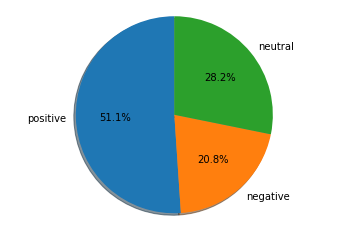

In [27]:
import matplotlib.pyplot as plt

labels = 'positive', 'negative', 'neutral'
sizes = list(df_counts.overall_counts)
#explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
#st.pyplot(fig1)

In [30]:
import plotly.graph_objects as go

figures = []

for category in categories:
    
    labels = ['positive', 'negative', 'neutral']
    values = list(df_counts[f'{category}'])
    print(values)
    index_max = np.argmax(values)
    print(index_max)
    pull = [0,0,0]
    pull[index_max] = 0.2
    print(pull)
    fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=pull)])
    fig.show()
    figures.append(fig)
    
figures

[26163, 13936, 12716]
0
[0.2, 0, 0]


[34475, 9353, 8987]
0
[0.2, 0, 0]


[31669, 9414, 11732]
0
[0.2, 0, 0]


[37708, 4928, 10179]
0
[0.2, 0, 0]


[26415, 14091, 12309]
0
[0.2, 0, 0]


[26969, 10963, 14883]
0
[0.2, 0, 0]


[Figure({
     'data': [{'labels': [positive, negative, neutral],
               'pull': [0.2, 0, 0],
               'type': 'pie',
               'values': [26163, 13936, 12716]}],
     'layout': {'template': '...'}
 }),
 Figure({
     'data': [{'labels': [positive, negative, neutral],
               'pull': [0.2, 0, 0],
               'type': 'pie',
               'values': [34475, 9353, 8987]}],
     'layout': {'template': '...'}
 }),
 Figure({
     'data': [{'labels': [positive, negative, neutral],
               'pull': [0.2, 0, 0],
               'type': 'pie',
               'values': [31669, 9414, 11732]}],
     'layout': {'template': '...'}
 }),
 Figure({
     'data': [{'labels': [positive, negative, neutral],
               'pull': [0.2, 0, 0],
               'type': 'pie',
               'values': [37708, 4928, 10179]}],
     'layout': {'template': '...'}
 }),
 Figure({
     'data': [{'labels': [positive, negative, neutral],
               'pull': [0.2, 0, 0],
              